<a href="https://colab.research.google.com/github/radical-p/Breakout_Deep_Q_Reinforcement_Learning/blob/main/Duck_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/RazvanDu/DUCK-Net.git

Cloning into 'DUCK-Net'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 105 (delta 42), reused 31 (delta 31), pack-reused 58
Receiving objects: 100% (105/105), 1.02 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ipateam/nuinsseg

Dataset URL: https://www.kaggle.com/datasets/ipateam/nuinsseg
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.52G/1.52G [00:15<00:00, 173MB/s]
100% 1.52G/1.52G [00:15<00:00, 108MB/s]


In [ ]:
!mkdir nuinsseg

In [ ]:
!unzip /content/nuinsseg.zip -d /content/nuinsseg

Streaming output truncated to the last 5000 lines.
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_19.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_20.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_21.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_22.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_23.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_24.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_25.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_26.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_27.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_28.png  
  inflating: /content/nuinsseg/mouse liver/nuclei border/disk1/mouse_liver_29.png  
  inflating: /content/nui

In [ ]:
!mkdir images

In [ ]:
!mkdir masks

In [ ]:
import os

base_path = '/content/nuinsseg/'
organ_num = [ name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name)) ]
print('total number of human and mosue organs:', len(organ_num))

organ_names = [ name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name)) ]
organ_names.sort()

total number of human and mosue organs: 31


In [ ]:
import cv2
import numpy as np

def preprocess_image(image):
    """
    Preprocesses a single image by applying Gaussian blurring, normalization, and histogram equalization.

    Parameters:
    - image: numpy array, input image in RGB format

    Returns:
    - processed_image: numpy array, processed image in RGB format
    """
    # Split the image into its three color channels
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Apply Gaussian Blurring
    red_blurred = cv2.GaussianBlur(red_channel, (5, 5), 0)
    green_blurred = green_channel
    #green_blurred = cv2.GaussianBlur(green_channel, (5, 5), 0)
    blue_blurred = cv2.GaussianBlur(blue_channel, (5, 5), 0)

    # Normalize the channels to the range 0-255 and convert to uint8
    red_normalized = cv2.normalize(red_blurred, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    green_normalized = cv2.normalize(green_blurred, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    blue_normalized = cv2.normalize(blue_blurred, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    # Apply Histogram Equalization
    red_equalized = cv2.equalizeHist(red_normalized)
    green_equalized = cv2.equalizeHist(green_normalized)
    blue_equalized = cv2.equalizeHist(blue_normalized)

    # Merge the channels back
    processed_image = cv2.merge((red_equalized, green_equalized, blue_equalized))

    return processed_image

def preprocess_images(images):
    """
    Preprocesses a list of images by applying Gaussian blurring, normalization, and histogram equalization to each image.

    Parameters:
    - images: list of numpy arrays, input images in RGB format

    Returns:
    - processed_images: list of numpy arrays, processed images in RGB format
    """
    processed_images = [preprocess_image(image) for image in images]
    return processed_images

In [ ]:
from glob import glob
import cv2

X = []
Y = []

# for i in range(31):
#   img_path = ''.join([base_path, organ_names[i], '/tissue images/'])
#   img_list = glob('{}*{}'.format(img_path, 'png'))
#   img_list.sort()
#   for j in range(len(img_list)):
#     img = cv2.imread(img_list[j])
#     img_name = img_list[j].split('/')[-1].split('.')[0]
#     cv2.imwrite('/content/images/' +img_name +'.png',img)

for i in range(31):
    img_path = ''.join([base_path, organ_names[i], '/tissue images/'])
    img_list = glob('{}*{}'.format(img_path, 'png'))
    img_list.sort()
    for j in range(len(img_list)):
        img = cv2.imread(img_list[j])
        #processed_img = preprocess_image(img)
        X.append(img)
        img_name = img_list[j].split('/')[-1].split('.')[0]
        cv2.imwrite('/content/images/' + img_name + '.png', img)


for i in range(31):
  random_organ  = organ_names[i]
  img_path = ''.join([base_path, organ_names[i], '/mask binary/'])
  img_list = glob('{}*{}'.format(img_path, 'png'))
  img_list = [path.replace('\\', '/') for path in img_list]
  img_list.sort()
  for j in range(len(img_list)):
    img = cv2.imread(img_list[j])
    img_name = img_list[j].split('/')[-1].split('.')[0]
    cv2.imwrite('/content/masks/' +img_name +'.png',img)

In [ ]:
cd DUCK-Net/

/content/DUCK-Net


In [ ]:
# Importing the necessary libraries

import tensorflow as tf
import albumentations as albu
import numpy as np
import gc
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, precision_score, recall_score, accuracy_score, f1_score
#from ModelArchitecture.DiceLoss import dice_metric_loss
#from ModelArchitecture import DUCK_Net
from ImageLoader import ImageLoader2D
from glob import glob
import cv2

In [ ]:
# Setting the model parameters

img_size = 256
dataset_type = 'cvc-colondb' # Options: kvasir/cvc-clinicdb/cvc-colondb/etis-laribpolypdb
learning_rate = 1e-3
seed_value = 58800
filters = 17 # Number of filters, the paper presents the results with 17 and 34
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

ct = datetime.now()

model_type = "DuckNet"

progress_path = '/content/' + dataset_type + '_progress_csv_' + model_type + '_filters_' + str(filters) +  '_' + str(ct) + '.csv'
progressfull_path = '/content/' + dataset_type + '_progress_' + model_type + '_filters_' + str(filters) + '_' + str(ct) + '.txt'
plot_path = '/content/' + dataset_type + '_progress_plot_' + model_type + '_filters_' + str(filters) + '_' + str(ct) + '.png'
model_path = '/content/' + dataset_type + model_type + '_filters_' + str(filters) + '_' + str(ct)

EPOCHS = 50
min_loss_for_saving = 0.2

In [ ]:
import glob

import numpy as np
from PIL import Image
from skimage.io import imread
from tqdm import tqdm

folder_path = "/content/"  # Add the path to your data directory


def load_data(img_height, img_width, images_to_be_loaded, dataset):
    IMAGES_PATH = folder_path + 'images/'
    MASKS_PATH = folder_path + 'masks/'

    if dataset == 'kvasir':
        train_ids = glob.glob(IMAGES_PATH + "*.jpg")

    if dataset == 'cvc-clinicdb':
        train_ids = glob.glob(IMAGES_PATH + "*.tif")

    if dataset == 'cvc-colondb' or dataset == 'etis-laribpolypdb':
        train_ids = glob.glob(IMAGES_PATH + "*.png")

    if images_to_be_loaded == -1:
        images_to_be_loaded = len(train_ids)
        print(images_to_be_loaded)

    X_train = np.zeros((images_to_be_loaded, img_height, img_width, 3), dtype=np.float32)
    Y_train = np.zeros((images_to_be_loaded, img_height, img_width), dtype=np.uint8)

    print('Resizing training images and masks: ' + str(images_to_be_loaded))
    for n, id_ in tqdm(enumerate(train_ids)):
        if n == images_to_be_loaded:
            break

        image_path = id_
        mask_path = image_path.replace("images", "masks")

        image = imread(image_path)
        mask_ = imread(mask_path)

        mask = np.zeros((img_height, img_width), dtype=np.bool_)

        pillow_image = Image.fromarray(image)

        pillow_image = pillow_image.resize((img_height, img_width))
        image = np.array(pillow_image)

        X_train[n] = image / 255

        pillow_mask = Image.fromarray(mask_)
        pillow_mask = pillow_mask.resize((img_height, img_width), resample=Image.LANCZOS)
        mask_ = np.array(pillow_mask)
        mask_ = cv2.cvtColor(mask_, cv2.COLOR_BGR2GRAY)

        for i in range(img_height):
            for j in range(img_width):
                if mask_[i, j] >= 127:
                    mask[i, j] = 1

        Y_train[n] = mask

    Y_train = np.expand_dims(Y_train, axis=-1)

    return X_train, Y_train


In [ ]:
X, Y = load_data(img_size, img_size, -1, dataset_type)

665
Resizing training images and masks: 665


665it [01:30,  7.32it/s]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle= True, random_state = seed_value)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.111, shuffle= True, random_state = seed_value)

In [ ]:
x_train.shape, type(x_train)

((531, 256, 256, 3), numpy.ndarray)

In [ ]:
# Defining the augmentations

aug_train = albu.Compose([
    albu.HorizontalFlip(),
    albu.VerticalFlip(),
    albu.ColorJitter(brightness=(0.6,1.6), contrast=0.2, saturation=0.1, hue=0.01, always_apply=True),
    albu.Affine(scale=(0.5,1.5), translate_percent=(-0.125,0.125), rotate=(-180,180), shear=(-22.5,22), always_apply=True),
])

def augment_images():
    x_train_out = []
    y_train_out = []

    for i in range (len(x_train)):
        ug = aug_train(image=x_train[i], mask=y_train[i])
        x_train_out.append(ug['image'])
        y_train_out.append(ug['mask'])

    return np.array(x_train_out), np.array(y_train_out)

In [ ]:
import tensorflow as tf
from keras.layers import Concatenate, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input

def simple_inception_block(x, filters, dilation_rate=1):
    branch1 = Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(x)
    branch1 = BatchNormalization(axis=-1)(branch1)

    branch3 = Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(x)
    branch3 = Conv2D(filters, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(branch3)
    branch3 = BatchNormalization(axis=-1)(branch3)

    branch5 = Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(x)
    branch5 = Conv2D(filters, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(branch5)
    branch5 = BatchNormalization(axis=-1)(branch5)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(branch_pool)
    branch_pool = BatchNormalization(axis=-1)(branch_pool)

    output = add([branch1, branch3, branch5, branch_pool])

    output = Conv2D(filters, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_initializer, dilation_rate=dilation_rate)(output)
    output = BatchNormalization(axis=-1)(output)

    return output

In [ ]:
from tensorflow.keras.layers import BatchNormalization, add
from keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Reshape, Dense, Multiply, Activation

kernel_initializer = 'he_uniform'

def attention_block(x, filters):
    avg_pool = GlobalAveragePooling2D()(x)
    avg_pool = Dense(filters//4, activation='relu')(avg_pool)
    avg_pool = Dense(filters, activation='sigmoid')(avg_pool)
    chn_att = Reshape((1, 1, filters))(avg_pool)
    chn_att = Multiply()([x, chn_att])

    spatial_att = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(chn_att)

    att_output = Multiply()([chn_att, spatial_att])

    return att_output


def conv_block_2D(x, filters, block_type, repeat=1, dilation_rate=1, size=3, padding='same'):
    result = x

    for i in range(0, repeat):

        if block_type == 'separated':
            result = separated_conv2D_block(result, filters, size=size, padding=padding)
        elif block_type == 'duckv2':
            result = duckv2_conv2D_block(result, filters, size=size)
        elif block_type == 'midscope':
            result = midscope_conv2D_block(result, filters)
        elif block_type == 'widescope':
            result = widescope_conv2D_block(result, filters)
        elif block_type == 'resnet':
            result = resnet_conv2D_block(result, filters, dilation_rate)
        elif block_type == 'conv':
            result = Conv2D(filters, (size, size),
                            activation='relu', kernel_initializer=kernel_initializer, padding=padding)(result)
        elif block_type == 'double_convolution':
            result = double_convolution_with_batch_normalization(result, filters, dilation_rate)

        else:
            return None

    return result


def duckv2_conv2D_block(x, filters, size):
    x = BatchNormalization(axis=-1)(x)
    x1 = widescope_conv2D_block(x, filters)

    x2 = midscope_conv2D_block(x, filters)

    x3 = conv_block_2D(x, filters, 'resnet', repeat=1)

    x4 = conv_block_2D(x, filters, 'resnet', repeat=2)

    x5 = conv_block_2D(x, filters, 'resnet', repeat=3)

    x6 = separated_conv2D_block(x, filters, size=6, padding='same')

    x7 = simple_inception_block(x, filters)

    x = add([x1, x2, x3, x4, x5, x6, x7])

    x = attention_block(x, filters)

    x = BatchNormalization(axis=-1)(x)

    #???
    # x = attention_block(x, filters)
    return x


def separated_conv2D_block(x, filters, size=3, padding='same'):
    # sobel_x = tf.constant([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=tf.float32)[:, None, None]
    # sobel_y = tf.constant([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=tf.float32)[:, None, None]

    # edge_x = Conv2D(1, (3, 1), padding='same', kernel_initializer='he_uniform', use_bias=False)(x)
    # edge_x = tf.nn.depthwise_conv2d(edge_x, sobel_x, strides=[1, 1, 1, 1], padding='SAME')

    # edge_y = Conv2D(1, (1, 3), padding='same', kernel_initializer='he_uniform', use_bias=False)(x)
    # edge_y = tf.nn.depthwise_conv2d(edge_y, sobel_y, strides=[1, 1, 1, 1], padding='SAME')

    # x = tf.concat([x, edge_x, edge_y], axis=-1)

    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters, (1, size), activation='relu', kernel_initializer=kernel_initializer, padding=padding)(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters, (size, 1), activation='relu', kernel_initializer=kernel_initializer, padding=padding)(x)
    x = BatchNormalization(axis=-1)(x)

    return x



def midscope_conv2D_block(x, filters):
    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=1)(x)

    x = BatchNormalization(axis=-1)(x)

    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=2)(x)

    x = BatchNormalization(axis=-1)(x)

    return x


def widescope_conv2D_block(x, filters):
    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=1)(x)

    x = BatchNormalization(axis=-1)(x)

    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=2)(x)

    x = BatchNormalization(axis=-1)(x)

    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=3)(x)

    x = BatchNormalization(axis=-1)(x)

    return x


def resnet_conv2D_block(x, filters, dilation_rate=1):
    x1 = Conv2D(filters, (1, 1), activation='relu', kernel_initializer=kernel_initializer, padding='same',
                dilation_rate=dilation_rate)(x)

    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=dilation_rate)(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=dilation_rate)(x)
    x = BatchNormalization(axis=-1)(x)
    x_final = add([x, x1])

    x_final = BatchNormalization(axis=-1)(x_final)

    return x_final


def double_convolution_with_batch_normalization(x, filters, dilation_rate=1):
    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=dilation_rate)(x)
    x = BatchNormalization(axis=-1)(x)
    x = Conv2D(filters, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',
               dilation_rate=dilation_rate)(x)
    x = BatchNormalization(axis=-1)(x)

    return x


In [ ]:
import tensorflow as tf
from keras.layers import Conv2D, UpSampling2D
from keras.layers import add
from keras.models import Model

# from CustomLayers.ConvBlock2D import conv_block_2D

kernel_initializer = 'he_uniform'
interpolation = "nearest"


def create_model(img_height, img_width, input_chanels, out_classes, starting_filters):
    input_layer = tf.keras.layers.Input((img_height, img_width, input_chanels))

    print('Starting DUCK-Net')

    p1 = Conv2D(starting_filters * 2, 2, strides=2, padding='same')(input_layer)
    p2 = Conv2D(starting_filters * 4, 2, strides=2, padding='same')(p1)
    p3 = Conv2D(starting_filters * 8, 2, strides=2, padding='same')(p2)
    p4 = Conv2D(starting_filters * 16, 2, strides=2, padding='same')(p3)
    p5 = Conv2D(starting_filters * 32, 2, strides=2, padding='same')(p4)

    t0 = conv_block_2D(input_layer, starting_filters, 'duckv2', repeat=1)

    l1i = Conv2D(starting_filters * 2, 2, strides=2, padding='same')(t0)
    s1 = add([l1i, p1])
    t1 = conv_block_2D(s1, starting_filters * 2, 'duckv2', repeat=1)

    l2i = Conv2D(starting_filters * 4, 2, strides=2, padding='same')(t1)
    s2 = add([l2i, p2])
    t2 = conv_block_2D(s2, starting_filters * 4, 'duckv2', repeat=1)

    l3i = Conv2D(starting_filters * 8, 2, strides=2, padding='same')(t2)
    s3 = add([l3i, p3])
    t3 = conv_block_2D(s3, starting_filters * 8, 'duckv2', repeat=1)

    l4i = Conv2D(starting_filters * 16, 2, strides=2, padding='same')(t3)
    s4 = add([l4i, p4])
    t4 = conv_block_2D(s4, starting_filters * 16, 'duckv2', repeat=1)

    l5i = Conv2D(starting_filters * 32, 2, strides=2, padding='same')(t4)
    s5 = add([l5i, p5])
    t51 = conv_block_2D(s5, starting_filters * 32, 'resnet', repeat=2)
    t53 = conv_block_2D(t51, starting_filters * 16, 'resnet', repeat=2)


    l5o = UpSampling2D((2, 2), interpolation=interpolation)(t53)
    c4 = add([l5o, t4])
    q4 = conv_block_2D(c4, starting_filters * 8, 'duckv2', repeat=1)

    l4o = UpSampling2D((2, 2), interpolation=interpolation)(q4)
    c3 = add([l4o, t3])
    q3 = conv_block_2D(c3, starting_filters * 4, 'duckv2', repeat=1)

    l3o = UpSampling2D((2, 2), interpolation=interpolation)(q3)
    c2 = add([l3o, t2])
    q6 = conv_block_2D(c2, starting_filters * 2, 'duckv2', repeat=1)

    l2o = UpSampling2D((2, 2), interpolation=interpolation)(q6)
    c1 = add([l2o, t1])
    q1 = conv_block_2D(c1, starting_filters, 'duckv2', repeat=1)

    l1o = UpSampling2D((2, 2), interpolation=interpolation)(q1)
    c0 = add([l1o, t0])
    z1 = conv_block_2D(c0, starting_filters, 'duckv2', repeat=1)

    output = Conv2D(out_classes, (1, 1), activation='sigmoid')(z1)

    model = Model(inputs=input_layer, outputs=output)

    return model

In [ ]:
model = create_model(img_height=img_size, img_width=img_size, input_chanels=3, out_classes=1, starting_filters=filters)

Starting DUCK-Net


In [ ]:
from ModelArchitecture.DiceLoss import dice_metric_loss

model.compile(optimizer=optimizer, loss=dice_metric_loss)

In [ ]:
# Training the model
EPOCHS = 50
step = 0

for epoch in range(0, EPOCHS):

    print(f'Training, epoch {epoch}')
    print('Learning Rate: ' + str(learning_rate))

    step += 1

    # image_augmented, mask_augmented = augment_images()
    image_augmented, mask_augmented = x_train, y_train

    image_augmented = np.asarray(image_augmented).astype(np.float32)
    mask_augmented = np.asarray(mask_augmented).astype(np.float32)

    csv_logger = CSVLogger(progress_path, append=True, separator=';')

    model.fit(x=image_augmented, y=mask_augmented, epochs=1, batch_size=4, validation_data=(x_valid, y_valid), verbose=1, callbacks=[csv_logger])

    prediction_valid = model.predict(x_valid, verbose=0)
    loss_valid = dice_metric_loss(y_valid, prediction_valid)

    loss_valid = loss_valid.numpy()
    print("Loss Validation: " + str(loss_valid))

    prediction_test = model.predict(x_test, verbose=0)
    loss_test = dice_metric_loss(y_test, prediction_test)
    loss_test = loss_test.numpy()
    print("Loss Test: " + str(loss_test))

    with open(progressfull_path, 'a') as f:
        f.write('epoch: ' + str(epoch) + '\nval_loss: ' + str(loss_valid) + '\ntest_loss: ' + str(loss_test) + '\n\n\n')

    if min_loss_for_saving > loss_valid:
        min_loss_for_saving = loss_valid
        print("Saved model with val_loss: ", loss_valid)
        model.save(model_path)

    del image_augmented
    del mask_augmented

    gc.collect()

Training, epoch 0
Learning Rate: 0.001
133/133 [==============================] - 323s 830ms/step - loss: 0.4301 - val_loss: 0.6724
Loss Validation: 0.63455784
Loss Test: 0.580371
Training, epoch 1
Learning Rate: 0.001
133/133 [==============================] - 90s 673ms/step - loss: 0.3341 - val_loss: 0.4990
Loss Validation: 0.48958844
Loss Test: 0.38357478
Training, epoch 2
Learning Rate: 0.001
133/133 [==============================] - 90s 674ms/step - loss: 0.2883 - val_loss: 0.3227
Loss Validation: 0.3127271
Loss Test: 0.31875175
Training, epoch 3
Learning Rate: 0.001
133/133 [==============================] - 90s 674ms/step - loss: 0.2925 - val_loss: 0.3170
Loss Validation: 0.31376374
Loss Test: 0.24420333
Training, epoch 4
Learning Rate: 0.001
133/133 [==============================] - 90s 675ms/step - loss: 0.2546 - val_loss: 0.3284
Loss Validation: 0.32025176
Loss Test: 0.25205296
Training, epoch 5
Learning Rate: 0.001
133/133 [==============================] - 90s 676ms/step 

In [ ]:
# Computing the metrics and saving the results

print("Loading the model")

model = tf.keras.models.load_model(model_path, custom_objects={'dice_metric_loss':dice_metric_loss})

prediction_train = model.predict(x_train, batch_size=4)
prediction_valid = model.predict(x_valid, batch_size=4)
prediction_test = model.predict(x_test, batch_size=4)

print("Predictions done")

dice_train = f1_score(np.ndarray.flatten(np.array(y_train, dtype=bool)),
                           np.ndarray.flatten(prediction_train > 0.5))
dice_test = f1_score(np.ndarray.flatten(np.array(y_test, dtype=bool)),
                          np.ndarray.flatten(prediction_test > 0.5))
dice_valid = f1_score(np.ndarray.flatten(np.array(y_valid, dtype=bool)),
                           np.ndarray.flatten(prediction_valid > 0.5))

print("Dice finished")


miou_train = jaccard_score(np.ndarray.flatten(np.array(y_train, dtype=bool)),
                           np.ndarray.flatten(prediction_train > 0.5))
miou_test = jaccard_score(np.ndarray.flatten(np.array(y_test, dtype=bool)),
                          np.ndarray.flatten(prediction_test > 0.5))
miou_valid = jaccard_score(np.ndarray.flatten(np.array(y_valid, dtype=bool)),
                           np.ndarray.flatten(prediction_valid > 0.5))

print("Miou finished")


precision_train = precision_score(np.ndarray.flatten(np.array(y_train, dtype=bool)),
                                  np.ndarray.flatten(prediction_train > 0.5))
precision_test = precision_score(np.ndarray.flatten(np.array(y_test, dtype=bool)),
                                 np.ndarray.flatten(prediction_test > 0.5))
precision_valid = precision_score(np.ndarray.flatten(np.array(y_valid, dtype=bool)),
                                  np.ndarray.flatten(prediction_valid > 0.5))

print("Precision finished")


recall_train = recall_score(np.ndarray.flatten(np.array(y_train, dtype=bool)),
                            np.ndarray.flatten(prediction_train > 0.5))
recall_test = recall_score(np.ndarray.flatten(np.array(y_test, dtype=bool)),
                           np.ndarray.flatten(prediction_test > 0.5))
recall_valid = recall_score(np.ndarray.flatten(np.array(y_valid, dtype=bool)),
                            np.ndarray.flatten(prediction_valid > 0.5))

print("Recall finished")


accuracy_train = accuracy_score(np.ndarray.flatten(np.array(y_train, dtype=bool)),
                                np.ndarray.flatten(prediction_train > 0.5))
accuracy_test = accuracy_score(np.ndarray.flatten(np.array(y_test, dtype=bool)),
                               np.ndarray.flatten(prediction_test > 0.5))
accuracy_valid = accuracy_score(np.ndarray.flatten(np.array(y_valid, dtype=bool)),
                                np.ndarray.flatten(prediction_valid > 0.5))


print("Accuracy finished")


final_file = '/content/' + 'results_' + model_type + '_' + str(filters) + '_' + dataset_type + '.txt'
print(final_file)

with open(final_file, 'a') as f:
    f.write(dataset_type + '\n\n')
    f.write('dice_train: ' + str(dice_train) + ' dice_valid: ' + str(dice_valid) + ' dice_test: ' + str(dice_test) + '\n\n')
    f.write('miou_train: ' + str(miou_train) + ' miou_valid: ' + str(miou_valid) + ' miou_test: ' + str(miou_test) + '\n\n')
    f.write('precision_train: ' + str(precision_train) + ' precision_valid: ' + str(precision_valid) + ' precision_test: ' + str(precision_test) + '\n\n')
    f.write('recall_train: ' + str(recall_train) + ' recall_valid: ' + str(recall_valid) + ' recall_test: ' + str(recall_test) + '\n\n')
    f.write('accuracy_train: ' + str(accuracy_train) + ' accuracy_valid: ' + str(accuracy_valid) + ' accuracy_test: ' + str(accuracy_test) + '\n\n\n\n')

print('File done')

Loading the model
17/17 [==============================] - 3s 178ms/step
Predictions done
Dice finished
Miou finished
Precision finished
Recall finished
Accuracy finished
/content/results_DuckNet_17_cvc-colondb.txt
File done


In [ ]:
model.save('/content/our_model')

In [ ]:
!zip -r /content/file.zip '/content/our_model/'

  adding: content/our_model/ (stored 0%)
  adding: content/our_model/variables/ (stored 0%)
  adding: content/our_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/our_model/variables/variables.index (deflated 81%)
  adding: content/our_model/saved_model.pb (deflated 92%)
  adding: content/our_model/assets/ (stored 0%)
  adding: content/our_model/fingerprint.pb (stored 0%)
  adding: content/our_model/keras_metadata.pb (deflated 96%)


In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp /content/att_inc_256.zip /content/drive/MyDrive

Mounted at /content/drive


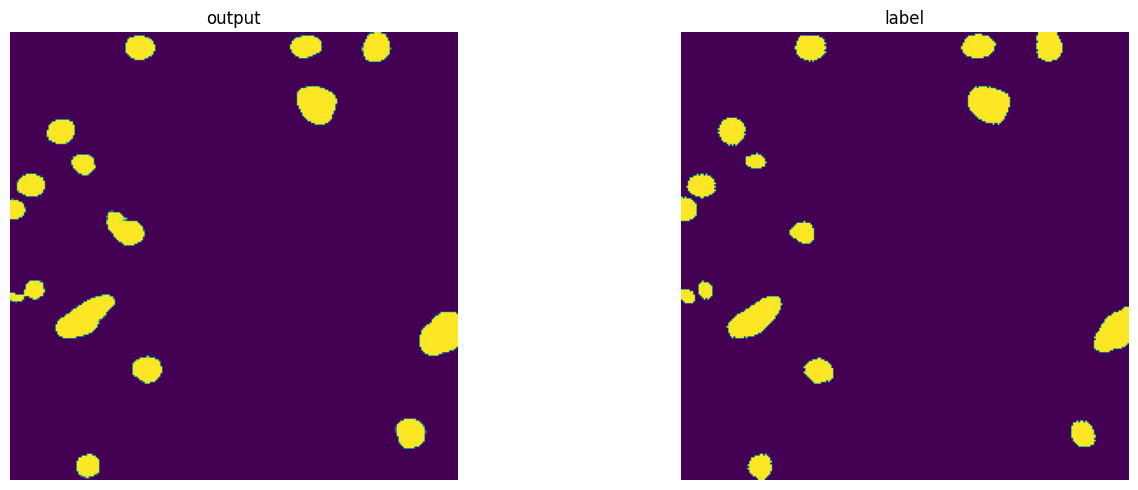

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the Red channel
axes[0].imshow(prediction_test[0])
axes[0].set_title('output')
axes[0].axis('off')

# Plot the Green channel
axes[1].imshow(y_test[0])
axes[1].set_title('label')
axes[1].axis('off')

axes[2].imshow(x_test[20])
axes[2].set_title('input')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the Red channel
axes[0].imshow(prediction_test[10])
axes[0].set_title('output')
axes[0].axis('off')

# Plot the Green channel
axes[1].imshow(y_test[10])
axes[1].set_title('label')
axes[1].axis('off')

axes[2].imshow(x_test[10])
axes[2].set_title('input')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

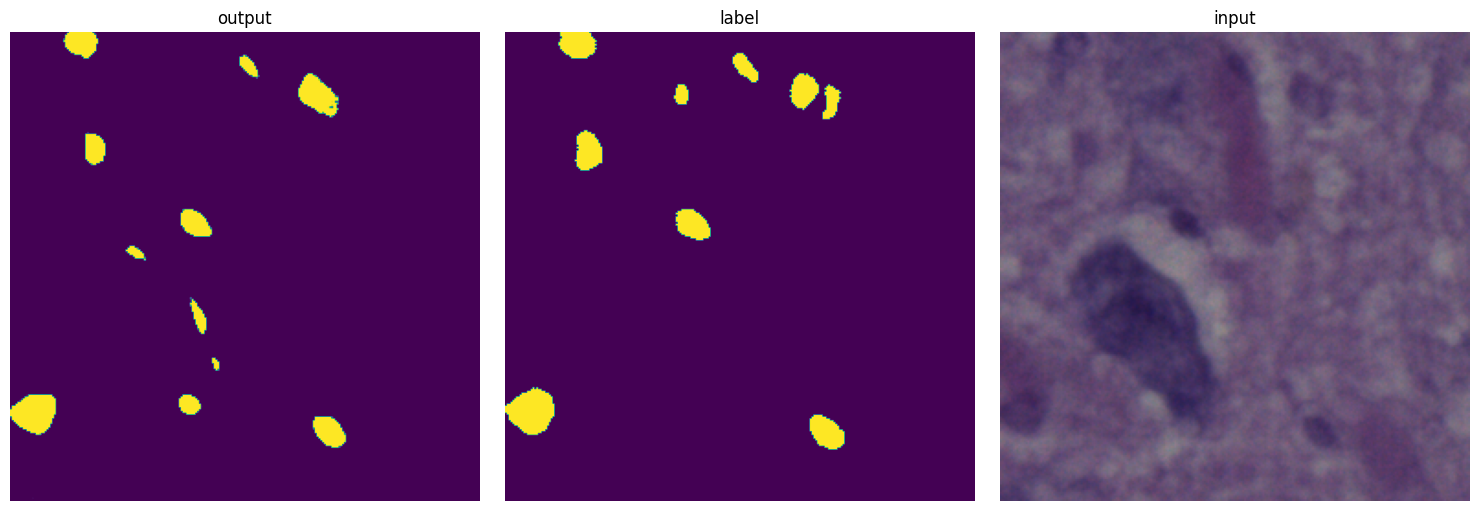

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Red channel
axes[0].imshow(prediction_test[20])
axes[0].set_title('output')
axes[0].axis('off')

# Plot the Green channel
axes[1].imshow(y_test[20])
axes[1].set_title('label')
axes[1].axis('off')

axes[2].imshow(x_test[20])
axes[2].set_title('input')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

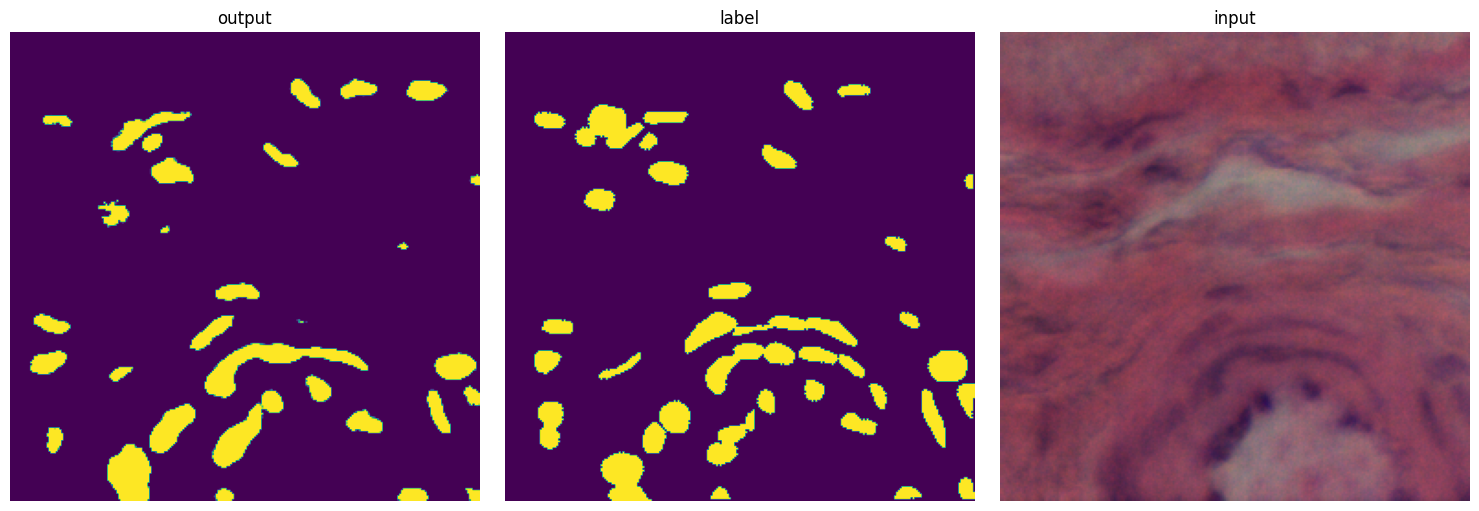